# **point_estimates**

In [197]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

%matplotlib inline


<AxesSubplot:>

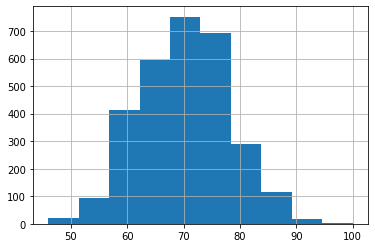

In [198]:
np.random.seed(1234)  # para obtenr series aleatorias con los mismos valores cada vez

# utilizar la distribucion de possion para simular 3000 personas que que se toman un descanso de
#  60 min y  respondieron ala pregunta: cuantos min descansas al dia

long_breaks = stats.poisson.rvs(        # generar variaciones aleatorias.
    loc=10,     # loc es como una escpecie de variacion hacia abajo de los datos resp. a la media
    mu=60,      # mu es la media
    size=3000)  # tamaño de la muestra que se va a generar

pd.Series(long_breaks).hist()


<AxesSubplot:>

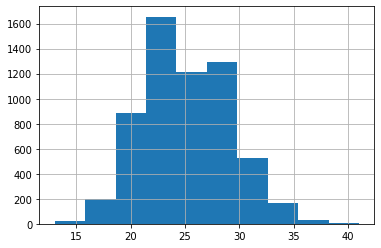

In [199]:
# utilizar la distribucion de possion para simular 6000 personas que que se toman un descanso de
#  15 min y  respondieron ala pregunta: cuantos min descansas al dia
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)  # generar variaciones aleatorias

pd.Series(short_breaks).hist()


39.99944444444444

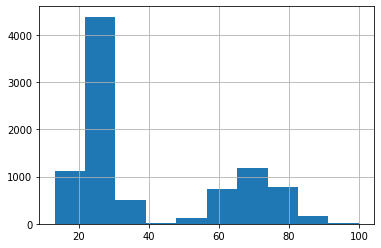

In [200]:
# unir las dos matrices para obtenre una poblacion de 9000 personas
breaks = np.concatenate((long_breaks, short_breaks))
pd.Series(breaks).hist()
breaks.mean()  # 39.99  population mean.


como podemos ver la media de las pausas son de 40 min en un poblacion de 9000 empleados. En el mundo real nuestro objetivo seria estimar el parametro de la poblacion pq no se le puede preguntar a cada uno de los 9000 empleados.Y es por eso que usamos estimacion puntual : preguntando  a 100 personas al azar y obteniendo la media muestral

In [201]:
np.random.seed(12)  # para obtenr series aleatorias con los mismos valores cada vez
sample100 = np.random.choice(a=breaks, size=100)
sample100.mean()


43.27

y lo que resulta interesante es que de una muestra aleatoria se mantuvo bastante cerca la media poblacional de la media de los datos y asi mismo ocurre con las proporciones de subpoblaciones dentro de la poblacion, por ejemplo la proporcion de hombres y mujeres en la muestra es similar a la que hay en la poblacion

# **sampling_distribution(distibuciones muestrales)**
Como podemos ver en el ultimo histograma los datos de las pausas de los empleados no se distribuyen de manera **normal** con el objetivo de lograr esto fue que utilzamos la **distribucion poisson** para generar las 9000 respuestas. 
Ahora a partir de nuestros datos vamos a crear datos normales producto de su importancia en muchas pruebas estadisticas. Para ellos necesitamos una **distribucion de muestreo** que es _una estimacion puntual de varias muestras del mismo tamaño_:

40.12561

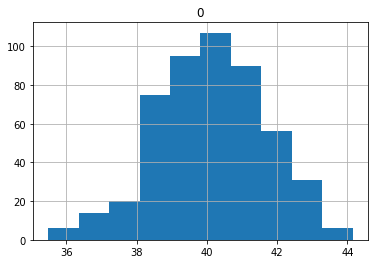

In [439]:
from random import random

sampling_distribution = []
# obtenre la estimacion muestal (media muestral) de 500 muestras de 100 empleados aleatorios
for i in range(500):
    sample = np.random.choice(a=breaks, size=200)
    sampling_distribution.append(sample.mean())

pd.DataFrame(sampling_distribution).hist()
'''np.median(sampling_distribution)    # para calcular la mediana'''
np.array(sampling_distribution).mean()


Como podemos ver ```la distribucion muestal de la media se asemeja a una Distribucion Normal```, y es a causa del ``` Teorema Central del Limite``` . Es importante mencionar que las barras de este histograma representan la duracion media de las pausas de 500 muestras de 100 empleados.  
# **confidence interval**

In [203]:
sample_size = 100
np.random.seed(1234)  # para obtenr series aleatorias con los mismos valores cada vez

# seleccionar una muestra de 100 empleados
sample = np.random.choice(a=breaks, size=sample_size)

sample_stdev = sample.std()    # desviacion standar muestral

# calcular el error estandar de la media o dicho de otro modola estimacion de la desviacion
# estandar de la poblacion, que representa la variabilidad entre muestras

sigma = sample_stdev/math.sqrt(sample_size)  # Usando la formula
sigma = stats.sem(sample)                    # utilizando el metodo sem() standard error of the mean

stats.t.interval(alpha=0.95,                         # Confidence level
                 df=sample.size() - 1,     # Degrees of freedom(tamaño de la muestra - 1)
                 loc=sample.mean(),                    # Sample mean
                 scale=sigma)                        # Error estandar de la media


(36.41239292115715, 45.14760707884285)

Y este es el intervalo de confianza para el tiempo de pausa medio de los empleados con un 95% de confianza. Es decir que tenemos una probalilidad dde 0.95 de que el intervalo contenga el valor real de la media poblacional que como vimos anteriormente es 39.9, ahora para evidenciar en su totalidad el significado de un % de confianza vamos a contruir 10000 intervalosde confinaza y calcularemos el % de en cuantos el valor real de la media esta incluido en el intervalo 

In [204]:
def make_confidence_interval():
    '''    this function is to create a confidence interval to 95%
    '''
    sample_size = 100

    # seleccionar una muestra de 100 empleados
    sample = np.random.choice(a=breaks, size=sample_size)

    return stats.t.interval(alpha=0.95,                 # Confidence level
                            df=sample_size - 1,     # Degrees of freedom(tamaño de la muestra - 1)
                            loc=sample.mean(),          # Sample mean
                            scale=stats.sem(sample))    # Standard deviation estimate


sum = 0
for i in range(10000):
    interval = make_confidence_interval()
    if interval[0] <= 39.9999 and interval[1] >= 39.9999:
        sum += 1
print(sum/float(10000))


0.9468


#### Lo que comprueba de que 10000 muestras el aprximadamente 95% de los intervalos contruidos contienen la media poblacional o real

# **One sample t-test (prueba t de una muestra)**
Determinar si existe una diferencia entre los tiempos de descanso de la poblacion general(empleados de la empresa) y  los tiempos de descanso de los empleados del departamento de ingenieria odicho de otro modo sis us medias son iguales

In [214]:
np.random.seed(123)
short_breaks_engineer = stats.poisson.rvs(loc=10, mu=15, size=300)
long_breaks_engineer = stats.poisson.rvs(loc=10, mu=55, size=100)

breaks_engineer = np.concatenate((short_breaks_engineer, long_breaks_engineer))
breaks_engineer.mean()
# como siempre no tenemos todos los datos para calcular la media poblacional y verificar si difieren o no las muestras; es por eso q resulta necesario las pruebas de hipotesis t de un muestra. 


35.2025

In [365]:
stats.ttest_1samp(a=breaks_engineer,               # Sample data
                  popmean=breaks.mean())              # Population mean

Ttest_1sampResult(statistic=-5.333475177902358, pvalue=1.6175171110769954e-07)

Como podemos ver nuetra muestra de engineer tiene **desviacion standar en notacion z igual a 5.333** 
respecto a la media poblacional lo que **da lugar a un p = 0.00000016** ```(este p se calcula con la funcion cdf(estadistico_t, df) que devuelve la funcion de distribucion acumulativa)) ```. y como este **p es menor** 
**que el nivel de significacion = 0.05, implica** q nuestra **hipoesis esta en la zona de rechazo**. 
Tal y como esperabamos ya que los datos no provienen de la misma poblacion, la hipotesis inicial 
es rechazada

In [335]:
stats.ttest_1samp(a=np.random.choice(a=breaks, size=400),               # Sample data
                  popmean=breaks.mean())              # Population mean
stats.mo

Ttest_1sampResult(statistic=1.2370853590050261, pvalue=0.21678297769947288)

Sin embargo como podemos ver en este otro ejemplo si la muestra si proviene realmente de la
poblacion,  los engineer tienen **desviacion standar en notacion z igual a 1.23** respecto a la media poblacional lo que **da lugar a un p = 0.21** ```(este p se calcula con la funcion cdf(estadistico_t, df) que devuelve la funcion de distribucion acumulativa)```. y como este **p es mayor que el nivel de**
**significacion = 0.05, implica** q nuestra **hipoesis esta en la zona de no rechazo**.

#### **Para muestras de una sola cola( unilaterales)**
**Con distribuciones simétricas el valor de p unilateral es solo la mitad del pvalue bilateral)**
* prueba menor  ```H0: μ <= X̅```  **se rechaza H0** ssi: estadistico_t < 0 and p/2 < alpha

* prueba mayor  ```H0: μ >= X̅```  **se rechaza H0** ssi: estadistico_t > 0 and p/2 < alpha

**Otra manera** de saber si **rechazamos o no rechazamos la hipotesis** es _comprando el valor estaditco_t obtenido con el valor critico de T correspondiente al nivel de signficacion alfa_. Si es una prueba de dos colas(bidireccional) el valor de alpha de divide por 2. y calculamos ese valor de la siguiente manera :
```python
alpha = 0.05 or 0.05/2 # si es una prueba de una cola o si es una preuba de dos colas
'''esta funcion ppf devuleve el valor al que corresponde una probabilidad acumulada-- (inverse of cdf) '''
t_crit = stats.t.ppf(            # saber el valor critico T que corresponde con el nivel de significacion
            alpha,      # nivel de sigificacion
            df=399)     # grados de libertad ( tamaño de la muestra - 1)
```
Finalmente hacemos la grafica y vemos si el estadistico_t se en una zona de rechazo (**por fuera del T critico**) o de no rechazo

* **El estadístico t obedece a la distribución t y, a medida que aumenta el grado de libertad (tamaño de muestra-1), la distribución t tiende gradualmente a la distribución normal.**

# **Chi-square godness of fit test (Bondad de ajuste $X^2$)**

In [422]:
# En un censo en 2009 los valores esperados de la poblacion de EEUU en % en cuatro categorias son :
expected = np.array([0.312, 0.331, 0.294, 0.063])

# de una muestra de 500 personas se recojen la siguiente observacion
sample_size = 500
observed = np.array([102, 178, 186, 34])

stats.chisquare(f_obs=observed, f_exp=expected*sample_size)


Power_divergenceResult(statistic=30.1817679275599, pvalue=1.26374310311106e-06)

Como podemos ver el p_values  es < que el nivel de significacion 0.05 y por lo tanto se rechaza la hipotesis nula.
```python 
# como calcular el valor de p a partir del estadistico Chi-cuadrado
p_value = 1- stats.chi2.cdf(30.1817679275599, df=3) #1.2637431031636837e-06
```

# **Chi-square independence test ($X^2$ de Independencia)**


In [438]:
observed = np.array([[120, 90, 40],
                     [110, 95, 45]])
chi_squared, p_value, degrees_of_freedom, matrix_expected = stats.chi2_contingency(
    observed=observed)
print(f'El estadistico es {chi_squared}  \n '
      f'El valor de p asociado al estadistico es {p_value} \n los grados de libertad(2-1) * (3-1)=' 
      f' {degrees_of_freedom} \n La matriz de valores esperados es: \n {matrix_expected}')


El estadistico es 0.8640353908896108  
 El valor de p asociado al estadistico es 0.6491978887380976 
 los grados de libertad(2-1) * (3-1)= 2 
 La matriz de valores esperados es 
 [[115.   92.5  42.5]
 [115.   92.5  42.5]]


Donde cada fila de la matriz esperada se calcula con la formula Σ(suma_fila)* Σ(suma_columna) / n

Dado que este valor p no es menor que 0.05, no rechazamos la hipótesis nula. Esto significa que no tenemos evidencia suficiente para decir que existe una asociación entre género y preferencia de partido político.